## 3. Database에서 데이터 가져오기 (MySQL)

In [3]:
import pymysql 
import pandas as pd 

conn = pymysql.connect(host='127.0.0.1', user='root', password='1234', db='covid',charset='utf8')
cur = conn.cursor()

In [4]:
covid_regions = [] 

cur.execute('SELECT * FROM regions')
datas = cur.fetchall()

for data in datas:
    covid_regions.append([data[0], data[1], data[2], data[3]])

covid_regions

[['0826', '서울', 76245, 675],
 ['0826', '경기', 68158, 586],
 ['0826', '대구', 13192, 101],
 ['0826', '인천', 11305, 120],
 ['0826', '부산', 10999, 86],
 ['0826', '경남', 9615, 104],
 ['0826', '경북', 6802, 71],
 ['0826', '충남', 6547, 76],
 ['0826', '검역', 5738, 12],
 ['0826', '대전', 5413, 64],
 ['0826', '강원', 5242, 46],
 ['0826', '충북', 4953, 59],
 ['0826', '울산', 3997, 38],
 ['0826', '광주', 3920, 23],
 ['0826', '전북', 3396, 40],
 ['0826', '제주', 2494, 27],
 ['0826', '전남', 2479, 8],
 ['0826', '세종', 944, 16]]

In [5]:
covid_week = []

cur.execute('SELECT * FROM weeks')
datas = cur.fetchall()

for data in datas:
    covid_week.append([data[0], data[1], data[2], data[3]])
    
covid_week

[['8.18', 2114, 38, 2152],
 ['8.19', 1999, 51, 2050],
 ['8.20', 1813, 66, 1879],
 ['8.21', 1588, 38, 1626],
 ['8.22', 1369, 48, 1417],
 ['8.23', 1469, 39, 1508],
 ['8.24', 2114, 41, 2155]]

In [6]:
conn.close()

In [7]:
region_columns = ['수집일자', '지역', '누적확진자', '신규확진자']
week_columns = ['일자','국내 발생','해외 유입', '신규 합계']

pd_region = pd.DataFrame(covid_regions, columns = region_columns)
pd_week = pd.DataFrame(covid_week, columns = week_columns)

In [8]:
pd_region.head()

,수집일자,지역,누적확진자,신규확진자
0,0826,서울,76245,675
1,0826,경기,68158,586
2,0826,대구,13192,101
3,0826,인천,11305,120
4,0826,부산,10999,86


In [9]:
pd_region.tail()

,수집일자,지역,누적확진자,신규확진자
13,0826,광주,3920,23
14,0826,전북,3396,40
15,0826,제주,2494,27
16,0826,전남,2479,8
17,0826,세종,944,16


In [10]:
pd_region.describe()

,누적확진자,신규확진자
count,18.000000,18.000000
mean,13413.277778,119.555556
std,21686.375457,189.399429
min,944.000000,8.000000
25%,3939.250000,29.750000
50%,5575.500000,61.500000
75%,10653.000000,97.250000
max,76245.000000,675.000000


In [11]:
sum_new_p = sum(pd_region['신규확진자'])
pd_region['신규 확진자 비율 (%)'] = round(pd_region['신규확진자'] / sum_new_p * 100, 1)
pd_region.head()

,수집일자,지역,누적확진자,신규확진자,신규 확진자 비율 (%)
0,0826,서울,76245,675,31.4
1,0826,경기,68158,586,27.2
2,0826,대구,13192,101,4.7
3,0826,인천,11305,120,5.6
4,0826,부산,10999,86,4.0


In [12]:
pd_region.sort_values(by='신규확진자', ascending=False)

,수집일자,지역,누적확진자,신규확진자,신규 확진자 비율 (%)
0,0826,서울,76245,675,31.4
1,0826,경기,68158,586,27.2
3,0826,인천,11305,120,5.6
5,0826,경남,9615,104,4.8
2,0826,대구,13192,101,4.7
4,0826,부산,10999,86,4.0
7,0826,충남,6547,76,3.5
6,0826,경북,6802,71,3.3
9,0826,대전,5413,64,3.0
11,0826,충북,4953,59,2.7


In [13]:
pd_week.head()

,일자,국내 발생,해외 유입,신규 합계
0,8.18,2114,38,2152
1,8.19,1999,51,2050
2,8.20,1813,66,1879
3,8.21,1588,38,1626
4,8.22,1369,48,1417


In [14]:
pd_week.tail()

,일자,국내 발생,해외 유입,신규 합계
2,8.20,1813,66,1879
3,8.21,1588,38,1626
4,8.22,1369,48,1417
5,8.23,1469,39,1508
6,8.24,2114,41,2155


In [15]:
pd_week.describe()

,국내 발생,해외 유입,신규 합계
count,7.000000,7.000000,7.000000
mean,1780.857143,45.857143,1826.714286
std,309.478825,10.253919,309.812693
min,1369.000000,38.000000,1417.000000
25%,1528.500000,38.500000,1567.000000
50%,1813.000000,41.000000,1879.000000
75%,2056.500000,49.500000,2101.000000
max,2114.000000,66.000000,2155.000000


In [21]:
pd_week.sort_values(by='신규 합계', ascending=False).head()

,일자,국내 발생,해외 유입,신규 합계
6,8.24,2114,41,2155
0,8.18,2114,38,2152
1,8.19,1999,51,2050
2,8.20,1813,66,1879
3,8.21,1588,38,1626


In [17]:
pd_week.sort_values(by='해외 유입', ascending=False)

,일자,국내 발생,해외 유입,신규 합계
2,8.20,1813,66,1879
1,8.19,1999,51,2050
4,8.22,1369,48,1417
6,8.24,2114,41,2155
5,8.23,1469,39,1508
0,8.18,2114,38,2152
3,8.21,1588,38,1626


시각화하기 - 최근 7일간 데이터 시각화 

In [18]:
import matplotlib.pyplot as plt 
import numpy as np 
from matplotlib import font_manager, rc 
import platform

# 그래프에서 한글을 표기하기 위해 글꼴 변경 
if platform.system() == 'Windows':
    path = 'c:/Windows/Fonts/malgun.ttf'
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font',family=font_name)
elif platform.system() == 'Darwin':   # macOS
    rc('font',family = 'AppleGothic')
else:
    print('Check your OS system')

In [19]:
x = np.array(7)
date_info = []
value_1 = []
value_2 = [] 
value_3 = [] 

for i in range(7):
    date_info.append(pd_week['일자'][i])
    value_1.append(pd_week['국내 발생'][i])
    value_2.append(pd_week['해외 유입'][i])
    value_3.append(pd_week['신규 합계'][i])

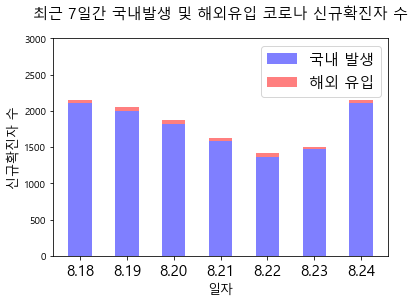

In [22]:
p1 = plt.bar(date_info, value_1, color='b', alpha=0.5, width=0.5)
p2 = plt.bar(date_info, value_2, color='r', alpha=0.5,bottom=value_1,width=0.5)
plt.title('최근 7일간 국내발생 및 해외유입 코로나 신규확진자 수',fontsize=15,pad=20)
plt.ylabel('신규확진자 수',fontsize=13)
plt.xlabel('일자',fontsize=13)
plt.xticks(date_info,fontsize=15)
plt.ylim([0,3000])
plt.legend((p1[0],p2[0]), ('국내 발생','해외 유입'), fontsize=15)
plt.show()